/var/folders/ht/h2dc913s3ls_1vqtpxzn37h80000gn/T/ipykernel_8368/4200339427.py:48: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
/var/folders/ht/h2dc913s3ls_1vqtpxzn37h80000gn/T/ipykernel_8368/4200339427.py:52: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)


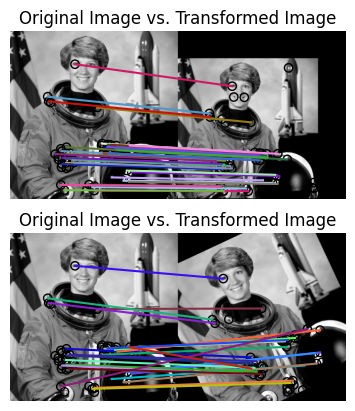

In [36]:
from skimage import data
from skimage import transform
from skimage.feature import (
    match_descriptors,
    corner_peaks,
    corner_harris,
    plot_matches,
    BRIEF,
)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


img1 = rgb2gray(data.astronaut())
tform = transform.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img2 = transform.warp(img1, tform)
img3 = transform.rotate(img1, 25)

keypoints1 = corner_peaks(corner_harris(img1), min_distance=5, threshold_rel=0.1)
keypoints2 = corner_peaks(corner_harris(img2), min_distance=5, threshold_rel=0.1)
keypoints3 = corner_peaks(corner_harris(img3), min_distance=5, threshold_rel=0.1)

extractor = BRIEF()

extractor.extract(img1, keypoints1)
keypoints1 = keypoints1[extractor.mask]
descriptors1 = extractor.descriptors

extractor = BRIEF()
extractor.extract(img2, keypoints2)
keypoints2 = keypoints2[extractor.mask]
descriptors2 = extractor.descriptors

extractor = BRIEF()
extractor.extract(img3, keypoints3)
keypoints3 = keypoints3[extractor.mask]
descriptors3 = extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)


fig, ax = plt.subplots(nrows=2, ncols=1)

# plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title('Original Image vs. Transformed Image')

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title('Original Image vs. Transformed Image')


plt.show()

In [21]:
print(keypoints1.shape, descriptors1.shape)
print(keypoints2.shape, descriptors2.shape)
print(keypoints3.shape, descriptors3.shape)

(47, 2) (47, 256)
(46, 2) (46, 256)
(43, 2) (43, 256)


In [34]:
# keypoints3[extractor.mask]

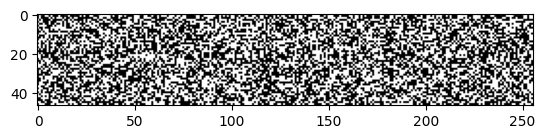

In [33]:
from ysf.draw import imshow
import numpy as np
import matplotlib.pyplot as plt

image = descriptors1.astype(np.uint8)
plt.imshow(image)
# 直方图

In [35]:
image

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0]], dtype=uint8)